<a href="https://colab.research.google.com/github/gusper01/TP1FIUBA/blob/master/Martin%20TP1_primer_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Organización de Datos**

## <Center>**Trabajo Práctico 1** Real or Not? NLP with Disaster Tweets

**Objetivo:**  
El objetivo del primer TP es realizar un análisis exploratorio del set de datos. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Estas cosas pueden estar relacionadas al objetivo del TP2 (predecir si un cierto tweet es real o no) o no,ambas son de interés.

In [0]:
# Importación general de librerías y de visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Importación del set de datos
train_raw = pd.read_csv('/home/martin/Datos/TP1/train.csv')
pd.options.display.max_colwidth = 150
train_raw.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


#### Características del set de datos

In [0]:
train_raw.shape

(7613, 5)

In [0]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [0]:
train_raw['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [0]:
train_raw.loc[train_raw['target'] == 1, 'keyword'].isna().value_counts(normalize = True)

False    0.98716
True     0.01284
Name: keyword, dtype: float64

In [0]:
train_raw.loc[:, 'location'].isna().value_counts()

False    5080
True     2533
Name: location, dtype: int64

In [0]:
train_raw.loc[train_raw['target'] == 0, 'location'].isna().value_counts(normalize = True)

False    0.66421
True     0.33579
Name: location, dtype: float64

In [0]:
train_raw.loc[train_raw['target'] == 1, 'location'].isna().value_counts(normalize = True)

False    0.671354
True     0.328646
Name: location, dtype: float64

#### Limpieza del set de datos

In [0]:
train = train_raw.dropna(subset = ['keyword'])
train.head(10)

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ablaze: SANTA CRUZ ÛÓ Head of the St Elizabeth Police Superintende... http://t.co/wDUEaj8Q4J,1
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,0


#### Análisis de las keywords

In [0]:
# Agrupo para contar la recurrencia de cada keyword
train_grouped = train.groupby(['target', 'keyword'])['id'].count().to_frame()
train_grouped.max()

id    40
dtype: int64

In [0]:
# Siendo 40 la máxima recurrencia de una keyword, tomo 15 como el valor mínimo necesario (?)
train_grouped_15 = train_grouped[train_grouped['id'] > 15]

# Modifico el formato dejando los target como atributo
train_grouped_unstacked = train_grouped_15.unstack(0)
train_grouped_unstacked.head()

# Me quedo con aquellas keyword que comparten target
train_grouped_unstacked = train_grouped_unstacked.dropna()

# Doy formato al nombre de las columnas
train_grouped_unstacked.columns = ['target: 0', 'target: 1']
train_grouped_unstacked.head()

,target: 0,target: 1
keyword,,
ambulance,18.0,20.0
bombed,19.0,19.0
burning%20buildings,16.0,21.0
collided,17.0,23.0
damage,22.0,19.0


In [0]:
# Le doy caracter porcentual a los atributos para la posterior visualización
train_grouped_unstacked['target%: 0'] = train_grouped_unstacked['target: 0']/(train_grouped_unstacked['target: 0'] + train_grouped_unstacked['target: 1'])
train_grouped_unstacked['target%: 1'] = train_grouped_unstacked['target: 1']/(train_grouped_unstacked['target: 0'] + train_grouped_unstacked['target: 1'])
train_grouped_unstacked.head()

,target: 0,target: 1,target%: 0,target%: 1
keyword,,,,
ambulance,18.0,20.0,0.473684,0.526316
bombed,19.0,19.0,0.500000,0.500000
burning%20buildings,16.0,21.0,0.432432,0.567568
collided,17.0,23.0,0.425000,0.575000
damage,22.0,19.0,0.536585,0.463415


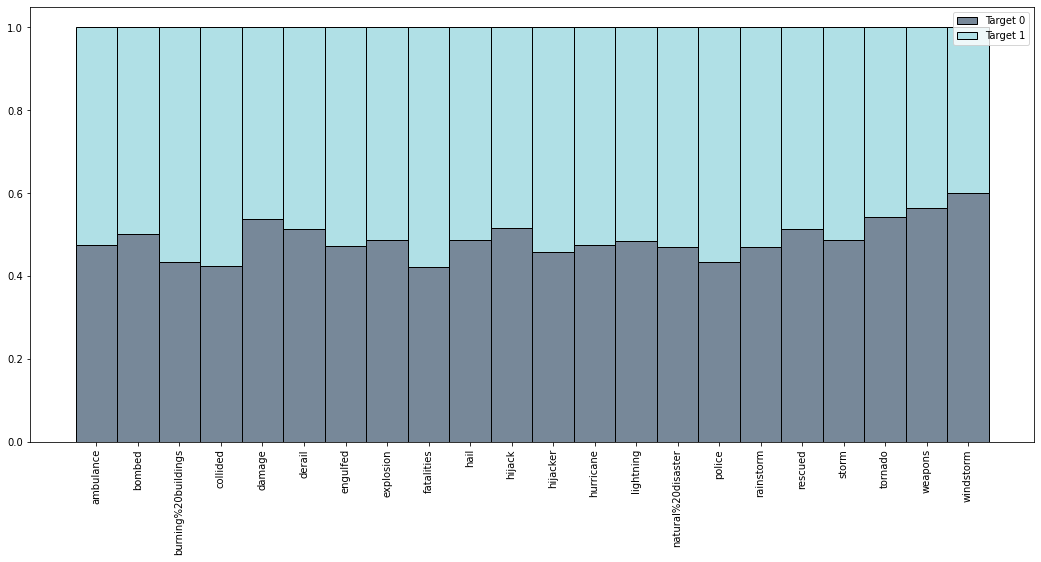

In [0]:
# Creo una visualización rápida en la que, para cada palabra, se muestra el aporte de cada uno de los target para llegar al
# 100% de la recurrencia
fig, ax = plt.subplots(figsize = (18,8))

ax.bar(train_grouped_unstacked.index, train_grouped_unstacked['target%: 0'], label = 'Target 0', 
       width = 1, color = 'lightslategray', edgecolor = 'black')
ax.bar(train_grouped_unstacked.index, train_grouped_unstacked['target%: 1'], label = 'Target 1', 
       bottom = train_grouped_unstacked['target%: 0'], width = 1, color = 'powderblue', edgecolor = 'black')

plt.xticks(train_grouped_unstacked.index, rotation='vertical')
ax.legend(['Target 0', 'Target 1'])
plt.show()

In [0]:
# Algunas palabras que sólo aparecen para target = 0
train_keyword_0 = train.loc[train['target'] == 0, 'keyword'].value_counts()
train_keyword_0.loc[train_keyword_0 > 15].head(10)

body%20bags    40
harm           37
armageddon     37
wrecked        36
ruin           36
deluge         36
explode        35
twister        35
siren          35
fear           35
Name: keyword, dtype: int64

In [0]:
# Ídem para target = 0
train_keyword_1 = train.loc[train['target'] == 1, 'keyword'].value_counts()
train_keyword_1.loc[train_keyword_1 > 15].head(10)

wreckage             39
outbreak             39
derailment           39
debris               37
typhoon              37
oil%20spill          37
rescuers             32
evacuated            32
suicide%20bombing    32
suicide%20bomb       32
Name: keyword, dtype: int64

#### Análisis de caracerísticas propias de los tweets:
##### (RT, hashtags, quotations, links, mentions, emojis, etc)

In [0]:
# RT
train.loc[train['text'].str.contains(r'(#)?RT\s') == True, 'target'].value_counts(normalize = True)

/home/martin/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0    0.515789
1    0.484211
Name: target, dtype: float64

In [0]:
# Hashtags
train.loc[train['text'].str.contains(r'\s#.*') == True, 'target'].value_counts(normalize = True)

0    0.523533
1    0.476467
Name: target, dtype: float64

In [0]:
# Mentions
train.loc[train['text'].str.contains(r'\s@.*') == True, 'target'].value_counts(normalize = True)

0    0.637931
1    0.362069
Name: target, dtype: float64

In [0]:
# webpages
train.loc[train['text'].str.contains(r'https://[a-zA-Z0-9].[a-z]([./a-zA-Z0-9])?') == True, 'target'].value_counts(normalize = True)

/home/martin/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0    0.669951
1    0.330049
Name: target, dtype: float64

In [0]:
#emojis: la carita feliz, por ejemplo
train.loc[(train['text'].str.contains(r':(-)?\)') == True), 'target'].value_counts()

/home/martin/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0    22
1     2
Name: target, dtype: int64

In [0]:
# Qué dicen los tweets de catástrofes que incluyen la carita feliz?
train.loc[(train['text'].str.contains(r':(-)?\)') == True) & train['target'] == 1]

/home/martin/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,id,keyword,location,text,target
819,1190,blizzard,Sydney,@Ashayo @MsMiggi Hi Ashayo! I believe there will be VODs on YouTube after the presentation but there is nothing like seeing it live :),1
2457,3525,derailment,UK,@Raishimi33 :) well I think that sounds like a fine plan where little derailment is possible so I applaud you :),1


In [0]:
#lol
train.loc[train['text'].str.contains(r'(lol)|(LOL)|(LoL)') == True, 'target'].value_counts(normalize = True)

/home/martin/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0    0.887324
1    0.112676
Name: target, dtype: float64

In [0]:
# Qué dicen los tweets de catástrofes que incluyen la palabra lol?
train.loc[(train['text'].str.contains(r'(lol)|(LOL)|(LoL)') == True) & (train['target'] == 1)].head(10)

/home/martin/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,id,keyword,location,text,target
2128,3056,deaths,"Mooseknuckle, Maine",ÛÏ@LOLGOP: 2.2 cases of voter fraud a year. \nWE NEED NEW LAWS!\n\n83 gun deaths a day. \nWHO ACTUALLY FOLLOWS LAWS AMIRITE?\n\n#VRA50Û,1
2152,3089,deaths,"the void, U.S.A",@HighQualityBird a reverse situation (lol I don't know 9/11?) where US civilian deaths were specifically utilized to make a political,1
5052,7201,natural%20disaster,Canada,@Cali74142290 lol natural disaster/hospital crisis something is needed to get rid of some cast members....,1
6047,8643,sinkhole,NaN,MRW when a sinkhole opens up beneath my friends and I... #gif #funny #lol #comedy #iFunny #video #image #RT http://t.co/XiYdYfptru,1
6701,9598,thunder,Baydestrian,suddenly it's off &amp; on gloomy &amp; thunder so loud it shakes the windows? Not ever on the Bay Area. Miss me w/that lol http://t.co/x4eCGGvnSN,1
6798,9738,tragedy,houston,@itss_selenaluna like a beautiful ass tragedy lol,1
6913,9912,trouble,YA MOTHA BED,@lucysforsale funny cause my dumb ass was the young one to get n trouble the most lol,1
7050,10101,typhoon,The Peach State,I think a Typhoon just passed through here lol,1
